# MountainCar — RL (Q-learning, discretized states)

Episode 0 | avg:-200.00 min:-200.00 max:-200.00 eps:0.999


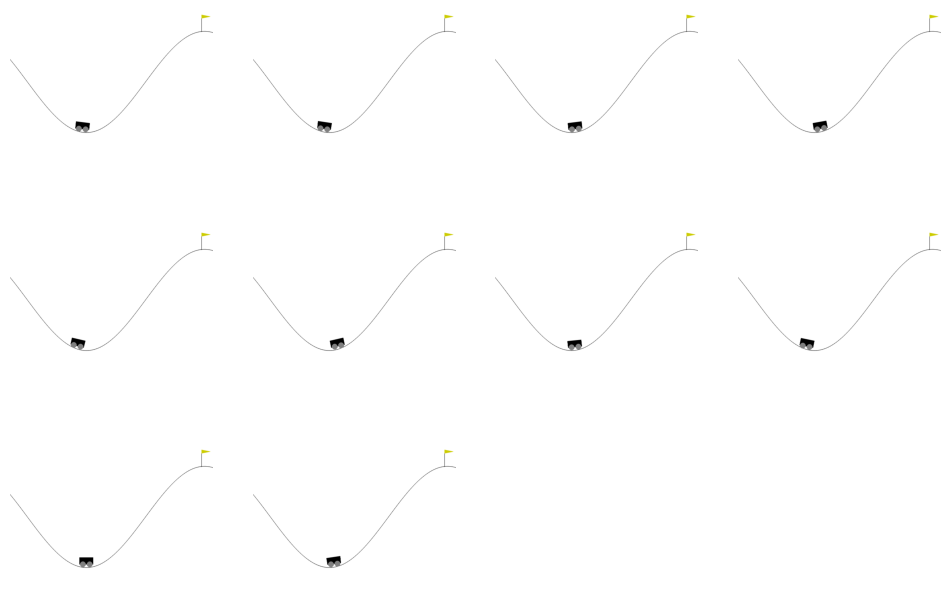

Episode 100 | avg:-200.00 min:-200.00 max:-200.00 eps:0.875


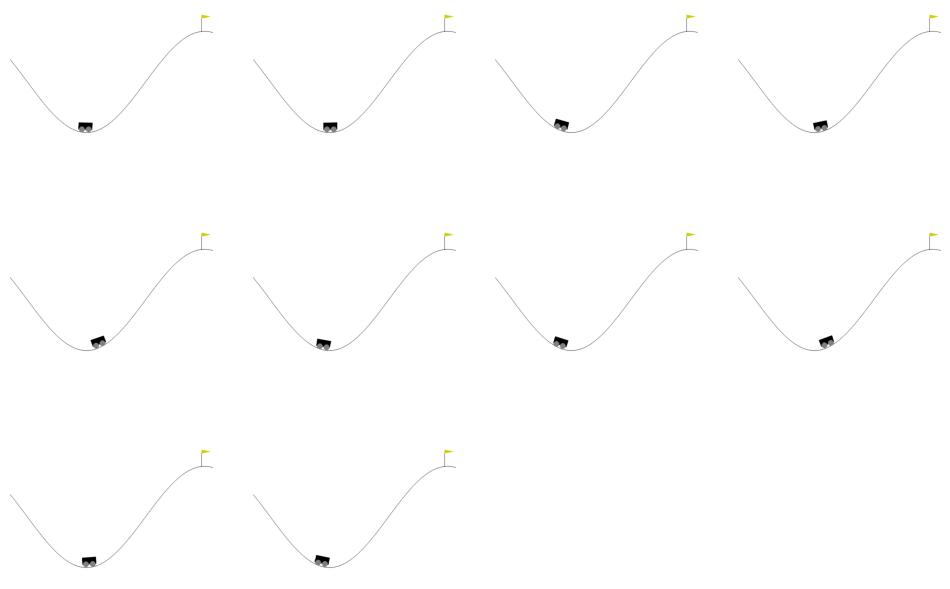

Episode 200 | avg:-200.00 min:-200.00 max:-200.00 eps:0.751


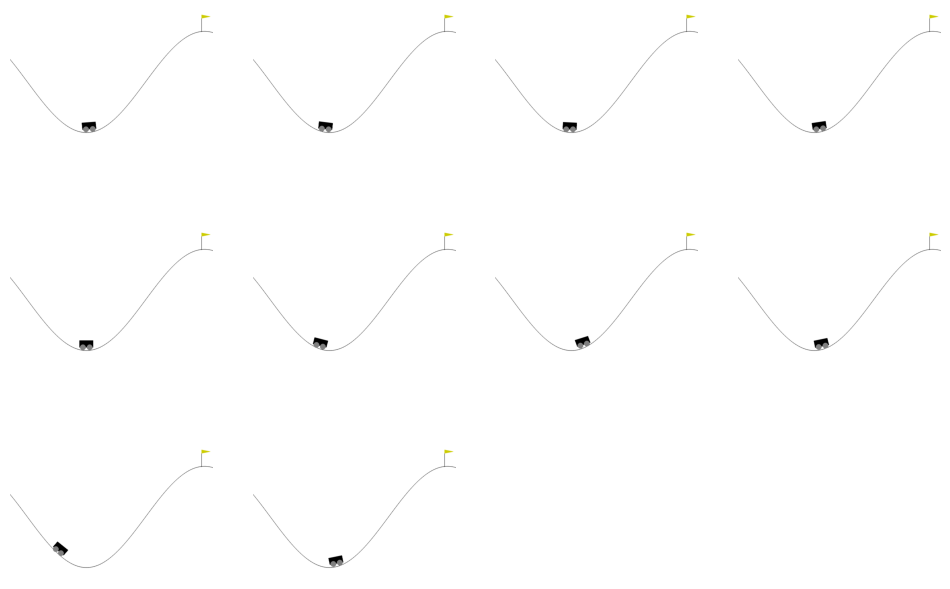

Episode 300 | avg:-200.00 min:-200.00 max:-200.00 eps:0.628


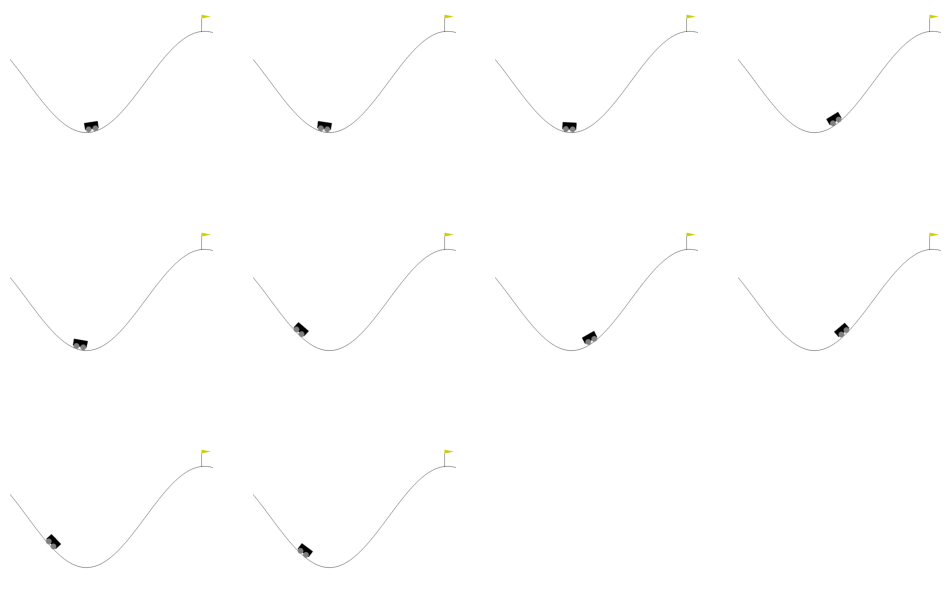

Episode 400 | avg:-200.00 min:-200.00 max:-200.00 eps:0.504


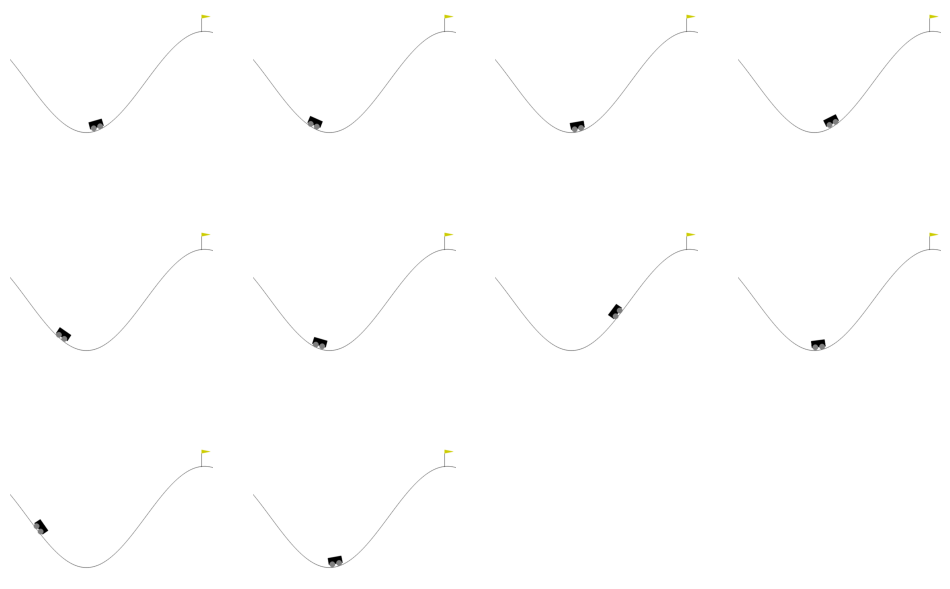

Episode 500 | avg:-200.00 min:-200.00 max:-200.00 eps:0.380


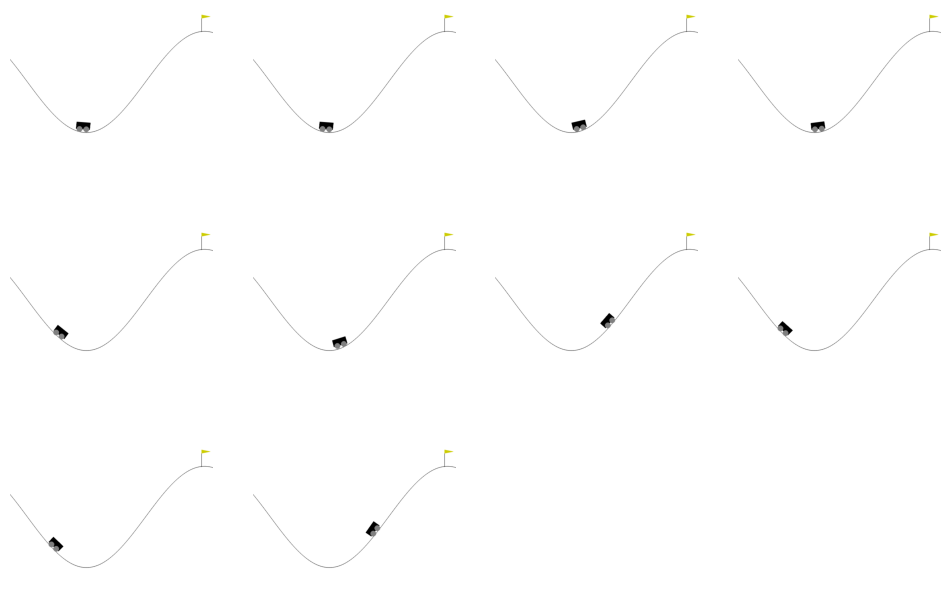

Episode 600 | avg:-200.00 min:-200.00 max:-200.00 eps:0.256


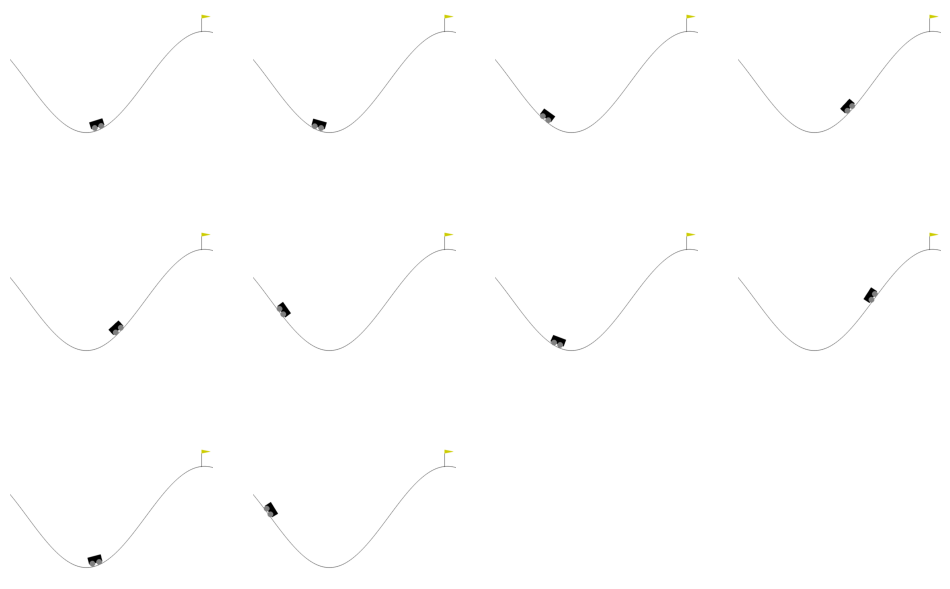

Episode 700 | avg:-200.00 min:-200.00 max:-200.00 eps:0.133


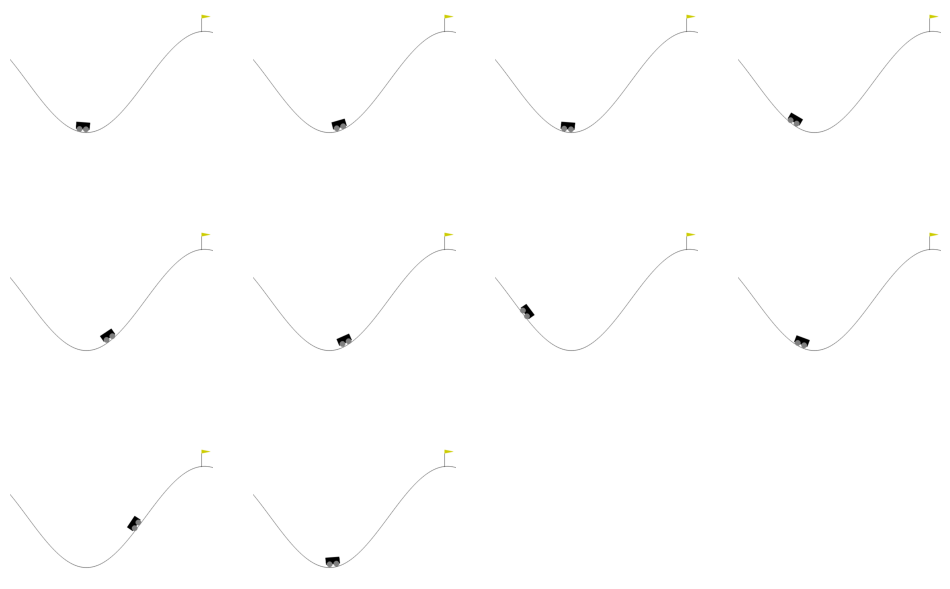

Episode 800 | avg:-200.00 min:-200.00 max:-200.00 eps:0.010


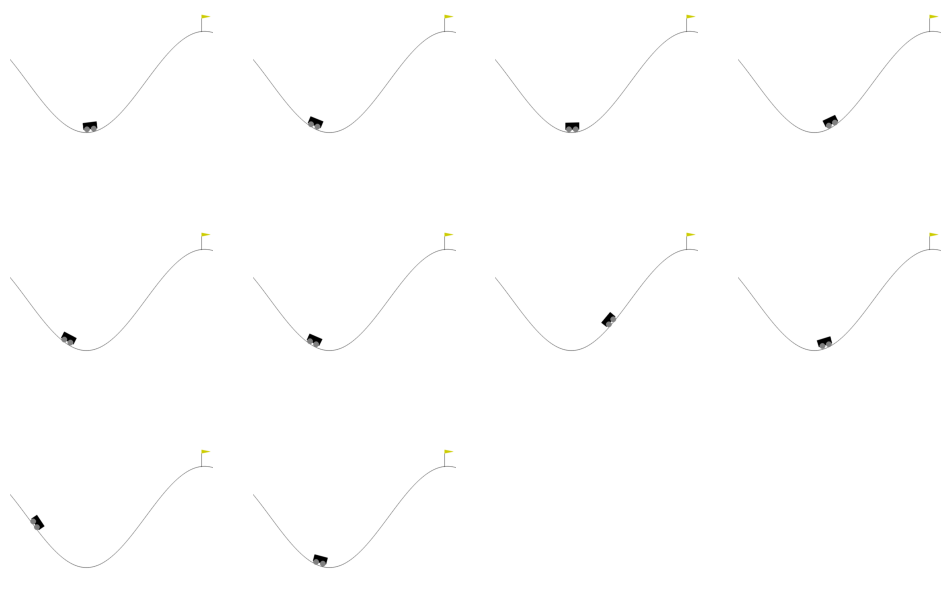

Episode 900 | avg:-200.00 min:-200.00 max:-200.00 eps:0.010


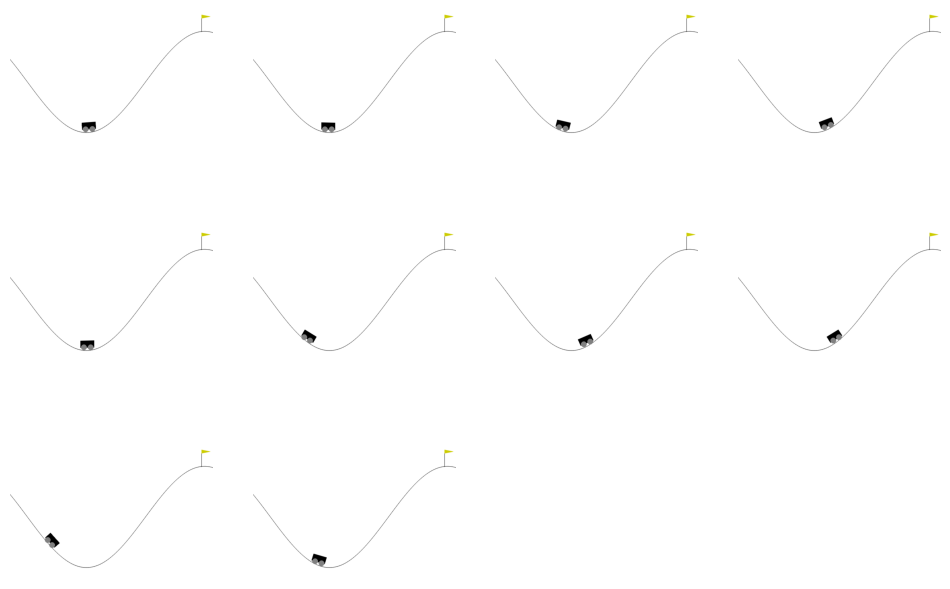

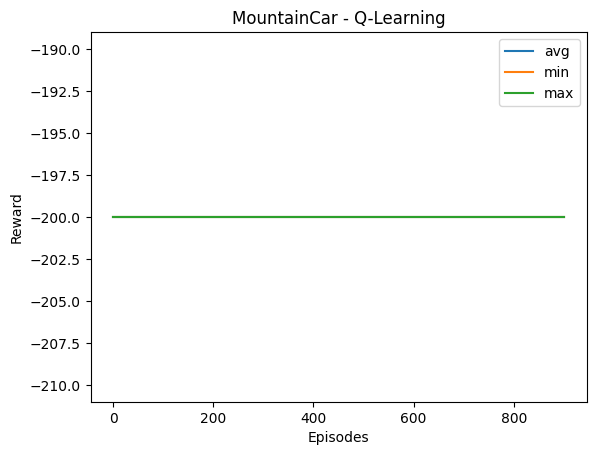

In [1]:
# mountaincar_qlearning.py
import gymnasium as gym # Changed to gymnasium
import numpy as np
import matplotlib.pyplot as plt

# ---------- Utility functions ----------
def select_elements_at_equal_distances(arr, num_elements):
    if len(arr) <= num_elements:
        return arr
    selected_elements = []
    interval = max(1, len(arr) // (num_elements - 1))
    for i in range(0, len(arr), interval):
        selected_elements.append(arr[i])
    return selected_elements

def show_frames(image_array):
    if len(image_array) == 0:
        return
    image_array = select_elements_at_equal_distances(image_array, 10)
    num_images = len(image_array)
    num_columns = 4
    num_rows = (num_images + num_columns - 1) // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 8))
    axes = np.atleast_2d(axes)
    for i in range(num_images):
        row, col = divmod(i, num_columns)
        axes[row, col].imshow(image_array[i])
        axes[row, col].axis('off')
    for i in range(num_images, num_rows * num_columns):
        row, col = divmod(i, num_columns)
        fig.delaxes(axes[row, col])
    plt.show()

# ---------- Environment & hyperparams ----------
env = gym.make("MountainCar-v0", render_mode='rgb_array')

DISCRETE_BUCKETS = 40          # finer discretization
EPISODES = 1000
DISCOUNT = 0.99
EPISODE_DISPLAY = 100
LEARNING_RATE = 0.1
EPSILON = 1.0
EPSILON_MIN = 0.01
EPSILON_DECAY = (EPSILON - EPSILON_MIN) / (EPISODES * 0.8)

# initialize Q-table
Q_TABLE = np.random.uniform(low=-2, high=0, size=(DISCRETE_BUCKETS, DISCRETE_BUCKETS, env.action_space.n))
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

# discretization helper
obs_space_low = env.observation_space.low
obs_space_high = env.observation_space.high
def discretise_state(state):
    ratios = (state - obs_space_low) / (obs_space_high - obs_space_low)
    new_state = (ratios * (DISCRETE_BUCKETS - 1)).astype(int)
    new_state = np.clip(new_state, 0, DISCRETE_BUCKETS - 1)
    return tuple(new_state)

# ---------- Training ----------
for episode in range(EPISODES):
    # Adjusted env.reset() to return observation and info
    state, _ = env.reset()
    d_state = discretise_state(state)
    done = False
    total_reward = 0
    render_frames = (episode % EPISODE_DISPLAY == 0)
    frames = []

    while not done:
        if np.random.random() > EPSILON:
            action = int(np.argmax(Q_TABLE[d_state]))
        else:
            action = env.action_space.sample()

        # Adjusted env.step() to return next_state, reward, terminated, truncated, and info
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        d_next = discretise_state(next_state)

        if render_frames:
            frames.append(env.render())

        # Q-learning update
        if not done:
            max_future = np.max(Q_TABLE[d_next])
            current_q = Q_TABLE[d_state + (action,)]
            new_q = current_q + LEARNING_RATE * (reward + DISCOUNT * max_future - current_q)
            Q_TABLE[d_state + (action,)] = new_q
        else:
            # if goal reached (position >= goal), set Q to 0 for that action
            # Access goal_position from env.unwrapped
            if next_state[0] >= env.unwrapped.goal_position:
                Q_TABLE[d_state + (action,)] = 0

        d_state = d_next
        total_reward += reward

    # epsilon decay
    EPSILON = max(EPSILON_MIN, EPSILON - EPSILON_DECAY)
    ep_rewards.append(total_reward)

    if episode % EPISODE_DISPLAY == 0:
        last = ep_rewards[-EPISODE_DISPLAY:]
        avg, mn, mx = np.mean(last), np.min(last), np.max(last)
        ep_rewards_table['ep'].append(episode)
        ep_rewards_table['avg'].append(avg)
        ep_rewards_table['min'].append(mn)
        ep_rewards_table['max'].append(mx)
        print(f"Episode {episode} | avg:{avg:.2f} min:{mn:.2f} max:{mx:.2f} eps:{EPSILON:.3f}")
        show_frames(frames)

env.close()

# ---------- Plot learning curve ----------
plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label='avg')
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label='min')
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label='max')
plt.title('MountainCar - Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()

# MountainCar — DRL (DQN using keras-rl2)

Episode 0, avg_reward(last20)=-200.00, eps=0.906
Episode 20, avg_reward(last20)=-200.00, eps=0.131
Episode 40, avg_reward(last20)=-200.00, eps=0.026
Episode 60, avg_reward(last20)=-200.00, eps=0.012
Episode 80, avg_reward(last20)=-200.00, eps=0.010
Episode 100, avg_reward(last20)=-200.00, eps=0.010
Episode 120, avg_reward(last20)=-194.90, eps=0.010
Episode 140, avg_reward(last20)=-200.00, eps=0.010
Episode 160, avg_reward(last20)=-196.10, eps=0.010
Episode 180, avg_reward(last20)=-191.70, eps=0.010
Episode 200, avg_reward(last20)=-162.70, eps=0.010
Episode 220, avg_reward(last20)=-153.40, eps=0.010
Episode 240, avg_reward(last20)=-149.80, eps=0.010
Episode 260, avg_reward(last20)=-149.00, eps=0.010
Episode 280, avg_reward(last20)=-150.45, eps=0.010
Episode 300, avg_reward(last20)=-144.95, eps=0.010
Episode 320, avg_reward(last20)=-135.45, eps=0.010
Episode 340, avg_reward(last20)=-149.00, eps=0.010
Episode 360, avg_reward(last20)=-135.70, eps=0.010
Episode 380, avg_reward(last20)=-138.

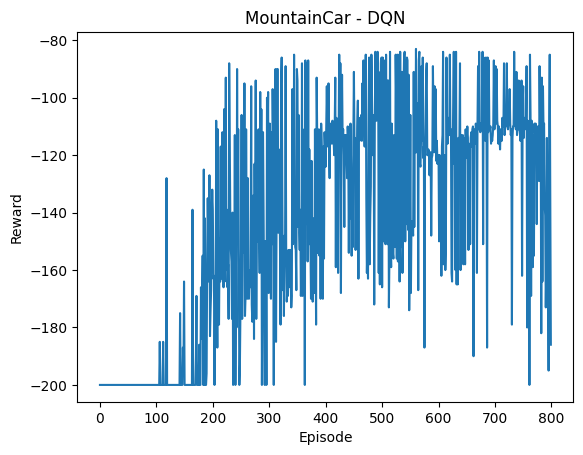

In [2]:
# mountaincar_dqn.py
import gymnasium as gym # Changed to gymnasium
import random
import numpy as np
from collections import deque
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# ---------- Replay Buffer ----------
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = map(np.array, zip(*batch))
        return states, actions, rewards, next_states, dones
    def __len__(self):
        return len(self.buffer)

# ---------- Q-Network ----------
class QNetwork(nn.Module):
    def __init__(self, n_obs, n_actions):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_obs, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, n_actions)
        )
    def forward(self, x):
        return self.net(x)

# ---------- Hyperparams ----------
# Changed to gymnasium
env = gym.make("MountainCar-v0")
n_obs = env.observation_space.shape[0]
n_actions = env.action_space.n

seed = 0
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)

buffer = ReplayBuffer(50000)
policy_net = QNetwork(n_obs, n_actions)
target_net = QNetwork(n_obs, n_actions)
target_net.load_state_dict(policy_net.state_dict())
optimizer = optim.Adam(policy_net.parameters(), lr=1e-3)

BATCH_SIZE = 64
GAMMA = 0.99
EPS_START = 1.0
EPS_END = 0.01
EPS_DECAY = 2000
TARGET_UPDATE = 200
NUM_EPISODES = 800

# epsilon schedule helper
def get_epsilon(step):
    return EPS_END + (EPS_START - EPS_END) * np.exp(-1. * step / EPS_DECAY)

# ---------- Training ----------
steps_done = 0
episode_rewards = []

for episode in range(NUM_EPISODES):
    # Adjusted env.reset() to return observation and info
    state, _ = env.reset()
    state = np.array(state, dtype=np.float32)
    total_reward = 0
    done = False

    while not done:
        eps = get_epsilon(steps_done)
        if random.random() > eps:
            with torch.no_grad():
                st = torch.tensor(state).unsqueeze(0)
                qvals = policy_net(st)
                action = int(qvals.argmax().item())
        else:
            action = env.action_space.sample()

        # Adjusted env.step() to return next_state, reward, terminated, truncated, and info
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        next_state = np.array(next_state, dtype=np.float32)
        buffer.push(state, action, reward, next_state, done)

        state = next_state
        total_reward += reward
        steps_done += 1

        # sample and train
        if len(buffer) >= BATCH_SIZE:
            states, actions, rewards, next_states, dones = buffer.sample(BATCH_SIZE)
            states_v = torch.tensor(states, dtype=torch.float32)
            actions_v = torch.tensor(actions, dtype=torch.int64).unsqueeze(1)
            rewards_v = torch.tensor(rewards, dtype=torch.float32)
            next_states_v = torch.tensor(next_states, dtype=torch.float32)
            dones_v = torch.tensor(dones, dtype=torch.float32)

            q_values = policy_net(states_v).gather(1, actions_v).squeeze(1)
            with torch.no_grad():
                next_q = target_net(next_states_v).max(1)[0]
                expected_q = rewards_v + GAMMA * next_q * (1 - dones_v)
            loss = nn.functional.mse_loss(q_values, expected_q)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if steps_done % TARGET_UPDATE == 0:
            target_net.load_state_dict(policy_net.state_dict())

    episode_rewards.append(total_reward)
    if episode % 20 == 0:
        avg = np.mean(episode_rewards[-20:])
        print(f"Episode {episode}, avg_reward(last20)={avg:.2f}, eps={get_epsilon(steps_done):.3f}")

env.close()

# ---------- Plot ----------
plt.plot(np.arange(len(episode_rewards)), episode_rewards)
plt.title('MountainCar - DQN')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

# Roulette — Q-Learning (Tabular RL)

Learned Q-values (expected reward per action):
Action  0 -> Q = 0.0000
Action  1 -> Q = -0.0160
Action  2 -> Q = -0.0614
Action  3 -> Q = -0.1461
Action  4 -> Q = -0.0995
Action  5 -> Q = -0.9824
Action  6 -> Q = -0.9983
Action  7 -> Q = -0.9606
Action  8 -> Q = -0.2461
Action  9 -> Q = -0.6266
Action 10 -> Q = -0.9977
Action 11 -> Q = -0.8907

Best action: 0 (Expected Reward = 0.0000)


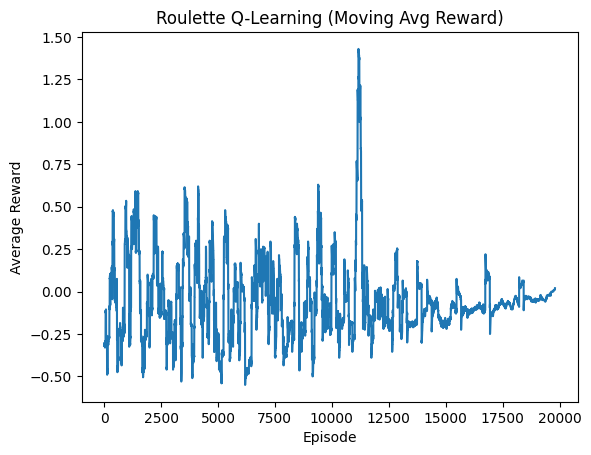

In [ ]:
# roulette_qlearning.py
import numpy as np
import random
import matplotlib.pyplot as plt

# ----------------------------------------
# Simple Roulette Environment
# ----------------------------------------
class RouletteEnv:
    """
    Simple Roulette simulation (European wheel 0–36).
    Actions:
        0 = Skip
        1 = Bet Red
        2 = Bet Black
        3 = Bet Odd
        4 = Bet Even
        5–11 = Bet single numbers 0–6
    """
    RED_NUMS = {1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36}

    def __init__(self, seed=None):
        random.seed(seed)

    def _spin(self):
        return random.randint(0, 36)

    def step(self, action):
        spin = self._spin()
        reward = 0.0
        if action == 0:
            reward = 0.0
        elif action == 1:  # Red
            reward = 1.0 if spin in RouletteEnv.RED_NUMS else -1.0
        elif action == 2:  # Black
            reward = 1.0 if (spin != 0 and spin not in RouletteEnv.RED_NUMS) else -1.0
        elif action == 3:  # Odd
            reward = 1.0 if (spin != 0 and spin % 2 == 1) else -1.0
        elif action == 4:  # Even
            reward = 1.0 if (spin != 0 and spin % 2 == 0) else -1.0
        elif 5 <= action <= 11:  # Single numbers 0–6
            number = action - 5
            reward = 35.0 if spin == number else -1.0
        return reward

# ----------------------------------------
# Q-Learning (stateless bandit)
# ----------------------------------------
def train_qlearning(env, episodes=20000, alpha=0.05, epsilon=1.0, epsilon_min=0.01):
    n_actions = 12
    Q = np.zeros(n_actions)
    epsilon_decay = (epsilon - epsilon_min) / episodes
    rewards = []

    for ep in range(episodes):
        # choose action
        if random.random() < epsilon:
            action = random.randint(0, n_actions - 1)
        else:
            action = int(np.argmax(Q))

        reward = env.step(action)
        Q[action] = Q[action] + alpha * (reward - Q[action])
        rewards.append(reward)
        epsilon = max(epsilon_min, epsilon - epsilon_decay)

    return Q, rewards

# ----------------------------------------
# Run experiment
# ----------------------------------------
if __name__ == "__main__":
    env = RouletteEnv(seed=42)
    Q, rewards = train_qlearning(env)

    print("Learned Q-values (expected reward per action):")
    for i, q in enumerate(Q):
        print(f"Action {i:2d} -> Q = {q:.4f}")

    print(f"\nBest action: {np.argmax(Q)} (Expected Reward = {np.max(Q):.4f})")

    # plot average reward
    window = 200
    avg_rewards = np.convolve(rewards, np.ones(window)/window, mode='valid')
    plt.plot(avg_rewards)
    plt.title("Roulette Q-Learning (Moving Avg Reward)")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.show()


# Roulette — Deep Q-Learning (DQN)

Episode 0 | Avg Reward (last 200): -1.0000 | eps=1.000
Episode 200 | Avg Reward (last 200): -0.3550 | eps=0.901
Episode 400 | Avg Reward (last 200): -0.0750 | eps=0.802
Episode 600 | Avg Reward (last 200): 0.2050 | eps=0.703
Episode 800 | Avg Reward (last 200): 0.2050 | eps=0.604
Episode 1000 | Avg Reward (last 200): 0.4850 | eps=0.505
Episode 1200 | Avg Reward (last 200): 0.4300 | eps=0.406
Episode 1400 | Avg Reward (last 200): 0.0250 | eps=0.307
Episode 1600 | Avg Reward (last 200): -0.1500 | eps=0.208
Episode 1800 | Avg Reward (last 200): -0.2200 | eps=0.109


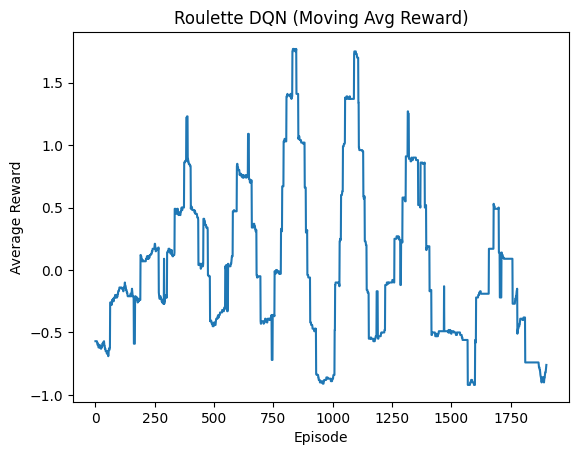


Learned Q-values:
Action  0 -> Q = 13.8543
Action  1 -> Q = 13.9212
Action  2 -> Q = 13.8503
Action  3 -> Q = 14.1575
Action  4 -> Q = 13.6608
Action  5 -> Q = 12.7177
Action  6 -> Q = 14.0456
Action  7 -> Q = 13.3428
Action  8 -> Q = 13.1196
Action  9 -> Q = 12.8468
Action 10 -> Q = 14.0329
Action 11 -> Q = 13.7355

Best action: 3 (Expected Reward ≈ 14.1575)


In [ ]:
# roulette_dqn.py
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import deque

# ----------------------------------------
# Environment (same as Q-Learning)
# ----------------------------------------
class RouletteEnv:
    RED_NUMS = {1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36}

    def __init__(self, seed=None):
        random.seed(seed)

    def _spin(self):
        return random.randint(0, 36)

    def step(self, action):
        spin = self._spin()
        reward = 0.0
        if action == 0:
            reward = 0.0
        elif action == 1:
            reward = 1.0 if spin in RouletteEnv.RED_NUMS else -1.0
        elif action == 2:
            reward = 1.0 if (spin != 0 and spin not in RouletteEnv.RED_NUMS) else -1.0
        elif action == 3:
            reward = 1.0 if (spin != 0 and spin % 2 == 1) else -1.0
        elif action == 4:
            reward = 1.0 if (spin != 0 and spin % 2 == 0) else -1.0
        elif 5 <= action <= 11:
            number = action - 5
            reward = 35.0 if spin == number else -1.0
        return reward

# ----------------------------------------
# Replay buffer
# ----------------------------------------
class ReplayBuffer:
    def __init__(self, capacity=10000):
        self.buffer = deque(maxlen=capacity)
    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.array(states), actions, rewards, np.array(next_states), dones
    def __len__(self):
        return len(self.buffer)

# ----------------------------------------
# DQN model
# ----------------------------------------
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )
    def forward(self, x):
        return self.layers(x)

# ----------------------------------------
# Train DQN
# ----------------------------------------
def train_dqn(episodes=2000):
    env = RouletteEnv(seed=2025)
    n_actions = 12
    state_dim = 1  # stateless; constant input

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    policy_net = DQN(state_dim, n_actions).to(device)
    target_net = DQN(state_dim, n_actions).to(device)
    target_net.load_state_dict(policy_net.state_dict())
    optimizer = optim.Adam(policy_net.parameters(), lr=1e-3)
    replay = ReplayBuffer(20000)

    gamma = 0.99
    epsilon = 1.0
    epsilon_min = 0.01
    epsilon_decay = (epsilon - epsilon_min) / episodes
    batch_size = 64
    sync_rate = 100
    rewards = []

    for ep in range(episodes):
        state = np.array([0.0], dtype=np.float32)
        total_reward = 0
        done = False

        # one step per episode (stateless)
        if random.random() < epsilon:
            action = random.randint(0, n_actions - 1)
        else:
            with torch.no_grad():
                q_values = policy_net(torch.tensor(state).unsqueeze(0).to(device))
                action = int(torch.argmax(q_values).item())

        reward = env.step(action)
        next_state = np.array([0.0], dtype=np.float32)
        replay.push(state, action, reward, next_state, done)
        total_reward += reward

        # learning
        if len(replay) >= batch_size:
            states, actions, rewards_b, next_states, dones = replay.sample(batch_size)
            states_v = torch.tensor(states, dtype=torch.float32, device=device)
            actions_v = torch.tensor(actions, dtype=torch.int64, device=device).unsqueeze(1)
            rewards_v = torch.tensor(rewards_b, dtype=torch.float32, device=device)
            next_states_v = torch.tensor(next_states, dtype=torch.float32, device=device)
            q_values = policy_net(states_v).gather(1, actions_v).squeeze(1)
            with torch.no_grad():
                next_q = target_net(next_states_v).max(1)[0]
                target = rewards_v + gamma * next_q
            loss = nn.functional.mse_loss(q_values, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if ep % sync_rate == 0:
            target_net.load_state_dict(policy_net.state_dict())

        epsilon = max(epsilon_min, epsilon - epsilon_decay)
        rewards.append(total_reward)
        if ep % 200 == 0:
            print(f"Episode {ep} | Avg Reward (last 200): {np.mean(rewards[-200:]):.4f} | eps={epsilon:.3f}")

    # plot
    avg_rewards = np.convolve(rewards, np.ones(100)/100, mode='valid')
    plt.plot(avg_rewards)
    plt.title("Roulette DQN (Moving Avg Reward)")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.show()

    # show learned Q-values
    with torch.no_grad():
        q = policy_net(torch.tensor([[0.0]], dtype=torch.float32).to(device)).cpu().numpy().flatten()
    print("\nLearned Q-values:")
    for i, val in enumerate(q):
        print(f"Action {i:2d} -> Q = {val:.4f}")
    print(f"\nBest action: {np.argmax(q)} (Expected Reward ≈ {np.max(q):.4f})")

if __name__ == "__main__":
    train_dqn()


# Shortest Path —(DRL) Implementation

In [ ]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. ENVIRONMENT (Same as the document's graph)
# ------------------------------------------------
edges = [(0, 1), (1, 5), (5, 6), (5, 4),
         (1, 2), (1, 3), (9, 10), (2, 4), (0, 6),
         (6, 7), (8, 9), (7, 8), (1, 7), (3, 9)]

G = nx.Graph()
G.add_edges_from(edges)
num_nodes = 11
goal_node = 10

# Create the Reward 'matrix' (as a dictionary for easy lookup)
R = {}
for node in G.nodes:
    R[node] = {}
    for neighbor in G[node]:
        if neighbor == goal_node:
            R[node][neighbor] = 100.0  # Reward for reaching goal
        else:
            R[node][neighbor] = -0.1   # Small cost for each step
    # Also add non-neighbors with a high penalty
    for n in G.nodes:
        if n not in R[node]:
            R[node][n] = -1.0 # Penalty for invalid moves

# 2. DQN AGENT
# ------------------------------------------------
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000) # Experience Replay
        self.gamma = 0.8  # Discount factor (same as doc)
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # Neural Network to approximate Q-value function
        model = Sequential()
        # Input layer: One-hot encoded state (size = 11 nodes)
        model.add(Dense(32, input_dim=self.state_size, activation='relu'))
        model.add(Dense(32, activation='relu'))
        # Output layer: Q-values for all 11 possible actions (nodes)
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        # Epsilon-greedy action selection
        if np.random.rand() <= self.epsilon:
            # Explore: pick a random valid neighbor
            return random.choice(list(G[state]))

        # Exploit: ask model for the best action
        # We pass in the one-hot encoded state
        state_one_hot = np.zeros(self.state_size)
        state_one_hot[state] = 1
        act_values = self.model.predict(state_one_hot.reshape(1, -1), verbose=0)
        return np.argmax(act_values[0]) # Choose action with highest Q-value

    def replay(self, batch_size):
        # Train the model from replay memory
        minibatch = random.sample(self.memory, batch_size)

        for state, action, reward, next_state, done in minibatch:
            # One-hot encode inputs
            state_one_hot = np.zeros(self.state_size)
            state_one_hot[state] = 1
            state_one_hot = state_one_hot.reshape(1, -1)

            next_state_one_hot = np.zeros(self.state_size)
            next_state_one_hot[next_state] = 1
            next_state_one_hot = next_state_one_hot.reshape(1, -1)

            # Get target Q-value
            target = reward
            if not done:
                # The DRL equivalent of: R[s,a] + discount * max(Q[s',a'])
                target = reward + self.gamma * \
                         np.amax(self.model.predict(next_state_one_hot, verbose=0)[0])

            # Get current Q-values from NN
            target_f = self.model.predict(state_one_hot, verbose=0)

            # Update the Q-value for the action we took
            target_f[0][action] = target

            # Train the model
            self.model.fit(state_one_hot, target_f, epochs=1, verbose=0)

        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# 3. TRAINING LOOP
# ------------------------------------------------
episodes = 500
batch_size = 32
agent = DQNAgent(num_nodes, num_nodes)

print("Training DRL agent...")
for e in range(episodes):
    # Start at a random node
    state = np.random.randint(0, num_nodes - 1)

    for time in range(100): # Max steps per episode
        action = agent.act(state) # Choose action

        # Get reward and next_state
        if action in R[state]:
            reward = R[state][action]
            next_state = action
        else:
            reward = -10.0 # Heavy penalty for invalid move
            next_state = state # Stay in same place

        done = (next_state == goal_node)

        # Store experience in memory
        agent.remember(state, action, reward, next_state, done)

        state = next_state
        if done:
            break

        # Train from memory
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

    if e % 50 == 0:
        print(f"Episode: {e}/{episodes}, Epsilon: {agent.epsilon:.2f}")

print("Training finished.")

# 4. FINDING THE PATH
# ------------------------------------------------
def find_shortest_path_drl(agent, begin, end):
    path = [begin]
    current_node = begin

    while current_node != end:
        # One-hot encode the current state
        state_one_hot = np.zeros(agent.state_size)
        state_one_hot[current_node] = 1

        # Use the trained model to predict Q-values
        q_values = agent.model.predict(state_one_hot.reshape(1, -1), verbose=0)[0]

        # Find the best next node (action)
        next_node = np.argmax(q_values)

        if next_node in path:
            # Failsafe to prevent cycles if model isn't perfect
            print("Cycle detected, breaking.")
            # Try picking a valid, unvisited neighbor
            valid_neighbors = [n for n in G[current_node] if n not in path]
            if not valid_neighbors:
                break # Stuck
            next_node = random.choice(valid_neighbors)

        path.append(next_node)
        current_node = next_node

        if len(path) > num_nodes: # Failsafe for non-convergence
            print("Path too long, stopping.")
            break

    return path

# Find and print the path
path_drl = find_shortest_path_drl(agent, 0, 10)
print(f"Shortest path found by DRL: {path_drl}")

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training DRL agent...
Episode: 0/500, Epsilon: 0.71
Episode: 50/500, Epsilon: 0.34
Episode: 100/500, Epsilon: 0.23


# Shortest Path — DQN (Deep RL)

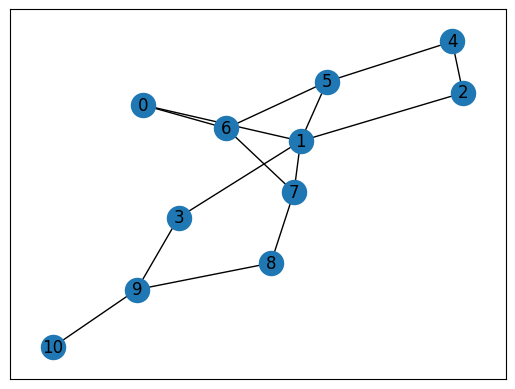

[0, np.int64(1), np.int64(3), np.int64(9), np.int64(10)]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import pandas as pd

# Define edges and create the graph
edges = [(0, 1),
         (1, 5),
         (5, 6),
         (5, 4),
         (1, 2), (1, 3), (9, 10), (2, 4), (0, 6), (6, 7), (8, 9), (7, 8),
         (1, 7),
         (3, 9)]

G = nx.Graph()
G.add_edges_from(edges)

# Draw the graph (optional, for visualization)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

# Initialize R-matrix (Rewards)
R = np.matrix(np.zeros(shape=(11, 11)))
for x in G[10]:
    R[x, 10] = 100  # Reward for reaching goal node 10

# Initialize Q-matrix
Q = np.matrix(np.zeros(shape=(11, 11)))
Q -= 100
for node in G.nodes:
    for x in G[node]:
        Q[node, x] = 0
        Q[x, node] = 0

# Display initial R and Q matrices (optional)
# pd.DataFrame(R)
# pd.DataFrame(Q)

# Function to select the next action (exploration vs. exploitation)
def next_number(start, er):
    random_value = random.uniform(0, 1)
    if random_value < er:
        sample = list(G[start]) # Convert neighbors to list
    else:
        sample = np.where(Q[start,] == np.max(Q[start,]))[1]

    # Ensure sample is a 1D array or list for np.random.choice
    if isinstance(sample, np.ndarray):
        sample = sample.flatten()

    next_node = int(np.random.choice(sample, 1)[0]) # Select one element
    return next_node

# Function to update the Q-matrix
def update(nodel, node2, lr, discount):
    max_index = np.where(Q[node2,] == np.max(Q[node2,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1)[0])
    else:
        max_index = int(max_index[0]) # Get the single element

    max_value = Q[node2, max_index]
    Q[nodel, node2] = int((1 - lr) * Q[nodel, node2] + lr * (R[nodel, node2] + discount * max_value))

# Learning function
def learn(er, lr, discount):
    for i in range(50000):
        start = np.random.randint(0, 11)
        next_node = next_number(start, er)
        update(start, next_node, lr, discount)

# Run the learning process
learn(0.5, 0.8, 0.8)

# Display the trained Q-matrix (optional)
# pd.DataFrame(Q)

# Function to find the shortest path using the trained Q-matrix
def shortest_path(begin, end):
    path = [begin]
    next_node = np.argmax(Q[begin,])
    path.append(next_node)
    while next_node != end:
        next_node = np.argmax(Q[next_node,])
        path.append(next_node)
    return path

# Get and print the shortest path
path = shortest_path(0, 10)
print(path)